Q1

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('clustering.csv')

# Inspect the column types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      400 non-null    float64
 1   x1      400 non-null    float64
 2   y       400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB
None


The features for clustering are the two coordinate columns, x0 and x1.

* Number of Features: The dataset has 2 features (columns x0 and x1).

* Feature Type: These features are quantitative (numerical), as they contain floating-point values (type float64).

Q2

The scatter plot has been saved as 'scatter_plot_q2.png'.


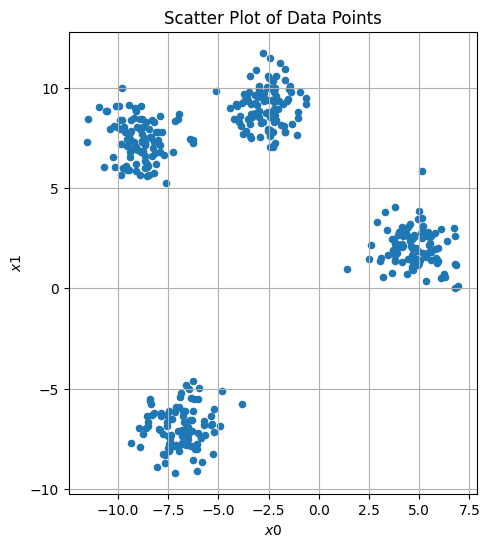

In [15]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['x0'], df['x1'], s=20) # s=20 sets the marker size
plt.title('Scatter Plot of Data Points')
plt.xlabel('$x0$')
plt.ylabel('$x1$')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Ensure axes are scaled equally
plt.savefig('scatter_plot_q2.png')

print("The scatter plot has been saved as 'scatter_plot_q2.png'.")

Q3

By visually inspecting the scatter plot generated in Question 2, we can make an initial hypothesis about the number of clusters.

Hypothesis: The data appears to form 4 distinct clusters: 2 at the top left, another at the bottom and a fourth one on the right.

Q4

In [16]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data and select features
df = pd.read_csv('clustering.csv')
X = df[['x0', 'x1']]

# Apply K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster_4'] = kmeans.fit_predict(X)

# Print cluster centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.74710337  2.01059427]
 [-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [-8.92921104  7.38196067]]


Q5

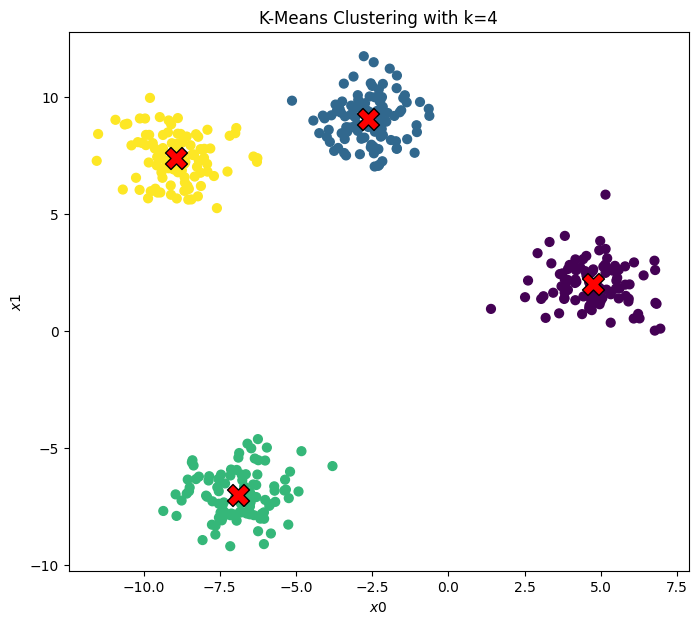

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data, fit K-Means with k=4, and get results
df = pd.read_csv('clustering.csv')
X = df[['x0', 'x1']]
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster_4'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.figure(figsize=(8, 7))
plt.scatter(df['x0'], df['x1'], c=df['cluster_4'], cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=250, edgecolors='black')
plt.title('K-Means Clustering with k=4')
plt.xlabel('$x0$')
plt.ylabel('$x1$')
plt.savefig('kmeans_k4_visualization_q5.png')

Q6

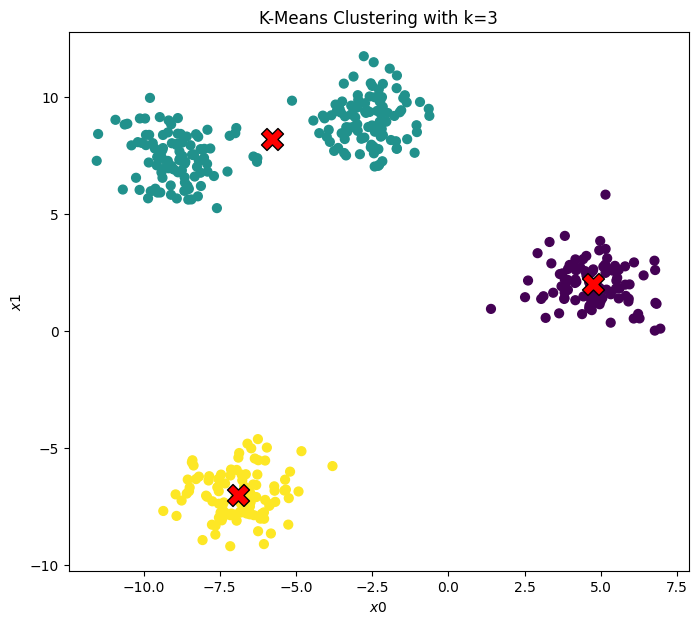

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data, fit K-Means with k=3, and get results
df = pd.read_csv('clustering.csv')
X = df[['x0', 'x1']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['cluster_4'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.figure(figsize=(8, 7))
plt.scatter(df['x0'], df['x1'], c=df['cluster_4'], cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=250, edgecolors='black')
plt.title('K-Means Clustering with k=3')
plt.xlabel('$x0$')
plt.ylabel('$x1$')
plt.savefig('kmeans_k3_visualization_q6.png')

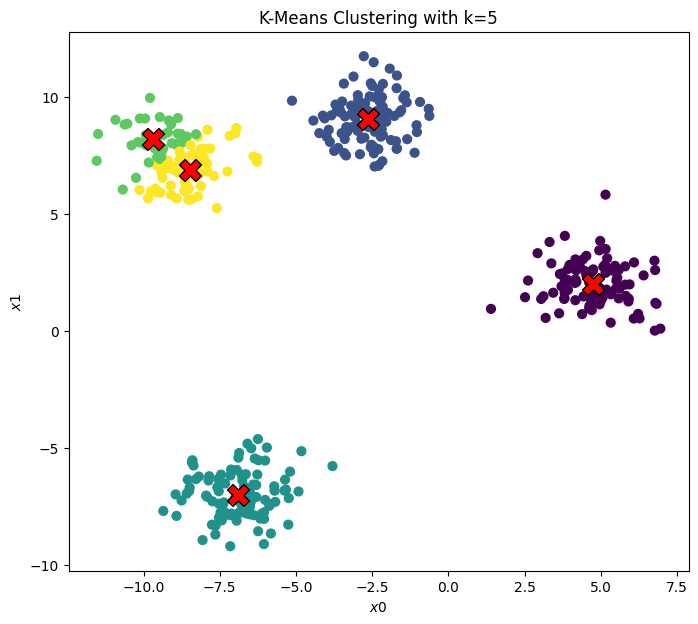

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data, fit K-Means with k=5, and get results
df = pd.read_csv('clustering.csv')
X = df[['x0', 'x1']]
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['cluster_4'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.figure(figsize=(8, 7))
plt.scatter(df['x0'], df['x1'], c=df['cluster_4'], cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=250, edgecolors='black')
plt.title('K-Means Clustering with k=5')
plt.xlabel('$x0$')
plt.ylabel('$x1$')
plt.savefig('kmeans_k5_visualization_q6.png')

Q7

* k = 3: Too few clusters which means that the model misses some structure = Underestimated.
* k = 4: Just right because the model captures all main groups clearly.
* k = 5: Too many clusters, splitting real clusters unnecessarily = Overfitting.

Best choice: k = 4 because it's clear, balanced, and true to the data.

Q8

In [20]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data and features
df = pd.read_csv('clustering.csv')
X = df[['x0', 'x1']]

# Calculate inertia for k=1 to 10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Print the results
for k, wcss in enumerate(inertia, 1):
    print(f"k={k}: Inertia={wcss:.2f}")

k=1: Inertia=27364.56
k=2: Inertia=13695.63
k=3: Inertia=2886.53
k=4: Inertia=766.52
k=5: Inertia=692.54
k=6: Inertia=622.11
k=7: Inertia=572.87
k=8: Inertia=504.83
k=9: Inertia=449.81
k=10: Inertia=411.61


Q10

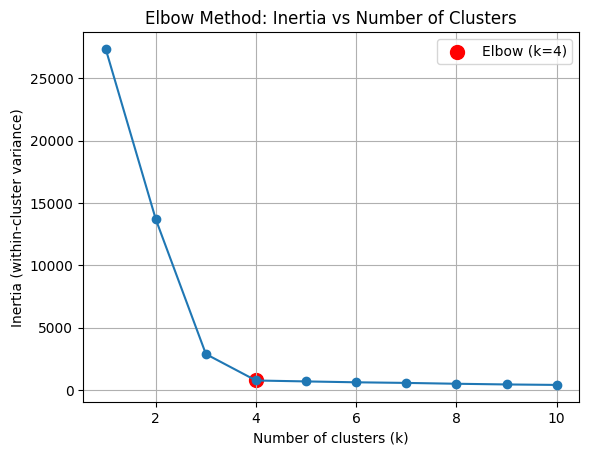

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("clustering.csv")

# Elbow method: test k from 1 to 10
inertias = []
k_values = range(1, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df)
    inertias.append(model.inertia_)

# Plot inertia vs k
plt.plot(k_values, inertias, marker='o')
plt.scatter(4, inertias[3], color='red', s=100, label='Elbow (k=4)')  # Highlight k=4
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster variance)')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()


Q11

k=4 is the point where the benefit of adding a new cluster (reduced variance) no longer outweighs the cost (increased model complexity), thus confirming the visual hypothesis made in the earlier steps.

Q12

In [22]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access the number of samples and features
n_samples = iris.data.shape[0]
n_features = iris.data.shape[1]

print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

Number of samples: 150
Number of features: 4


Q13


The next question in your assignment is: Ask your favorite generative AI why it is important to standardize features. Then, standardize the features of the Iris dataset using your favorite generative AI.

I will answer the theoretical part first and then provide the code to standardize the Iris features.

Answer to Question 13
Why Feature Standardization is Important

Standardizing features is crucial in machine learning, especially for algorithms that rely on distance calculations, like K-Means clustering.

Distance Metrics: Algorithms like K-Means use Euclidean distance to determine cluster membership and calculate centroids. If features have different scales (e.g., Sepal Length is 4-8 cm, but a hypothetical feature is 1-1000), the feature with the larger range will dominate the distance calculation.

Equal Contribution: Standardization (using Z-score normalization) rescales all features so they have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the distance computation, preventing bias toward features with naturally larger magnitudes.

Faster Convergence: For iterative algorithms, standardizing the data often leads to faster convergence of the optimization process.

In [23]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris features
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize the features
scaler = StandardScaler()
X_scaled_np = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_np, columns=X.columns)

# Display head of scaled data
print(X_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Q14

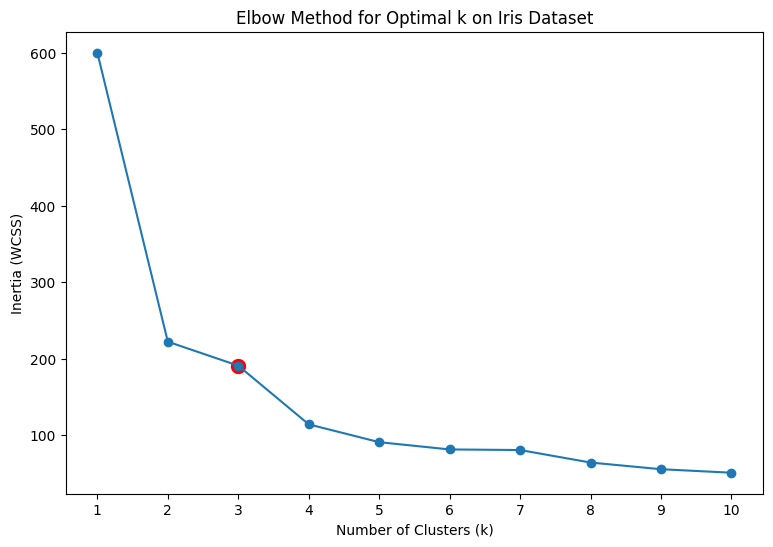

In [24]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and Standardize Features
iris = load_iris()
X = StandardScaler().fit_transform(iris.data) # Standardize in one line

# 2. Calculate Inertia for k=1 to 10
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 3. Plot the Elbow Method
plt.figure(figsize=(9, 6))
plt.plot(k_range, inertia, marker='o')
plt.scatter(3, inertia[2], color='red', s=100, label='Elbow (k=3)')
plt.title('Elbow Method for Optimal k on Iris Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.savefig('iris_elbow_method_plot_q14.png')

Q15

A box and whisker plot (or simply a box plot) is a standardized way of displaying the distribution of a dataset based on a five-number summary.

What is a Box Plot?

It is a graphical method that shows data distribution through five key values.

It is particularly useful for comparing the distribution and central tendency of multiple datasets (like features across different clusters).

How to Interpret the Plot

The plot is composed of a central box and two lines extending from the box called whiskers.

Q16

/tmp/ipython-input-2350097520.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
/tmp/ipython-input-2350097520.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
/tmp/ipython-input-2350097520.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
/tmp/ipython-input-2350097520.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support

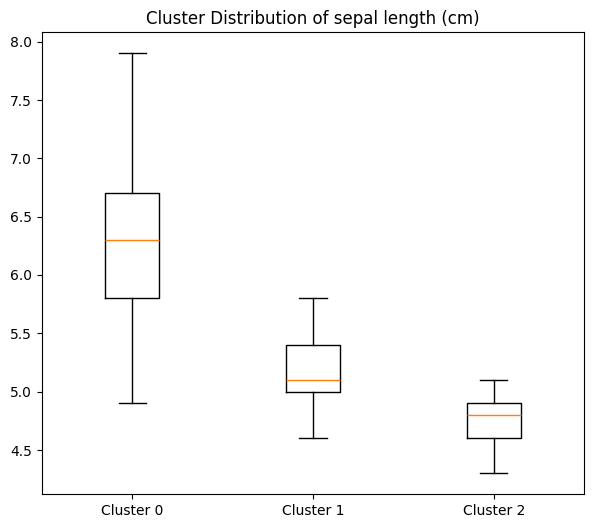

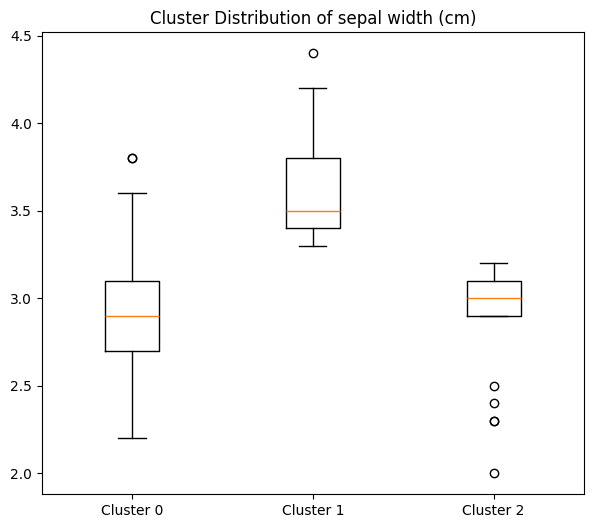

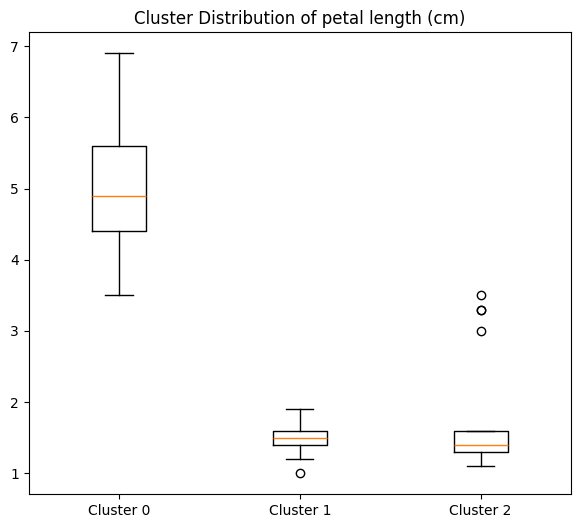

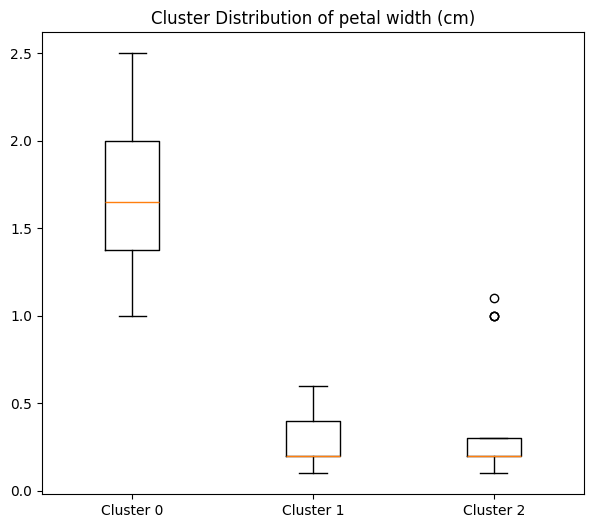

In [25]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Load, scale, and cluster the data (k=3)
iris = load_iris()
X_original = pd.DataFrame(iris.data, columns=iris.feature_names)
X_scaled = StandardScaler().fit_transform(X_original)
cluster_labels = KMeans(n_clusters=3, random_state=42, n_init='auto').fit_predict(X_scaled)

# Add cluster labels to the original data
df_clustered = X_original.copy()
df_clustered['Cluster'] = cluster_labels

# Generate box plots for each feature
for feature in X_original.columns:
    plt.figure(figsize=(7, 6))
    plot_data = [df_clustered[df_clustered['Cluster'] == i][feature].values for i in range(3)]
    plt.boxplot(plot_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
    plt.title(f'Cluster Distribution of {feature}')
    plt.savefig(f'box_plot_{feature}.png')

Q17

The median values derived from the box plots (which are represented by the line inside the box) are the best indicator of the typical characteristics of each cluster.

The table below summarizes the median values of the original features (in cm) for the three clusters:

Cluster	Sepal Length (cm)	Sepal Width (cm)	Petal Length (cm)	Petal Width (cm)
0	6.3	2.9	4.9	1.65
1	5.1	3.5	1.5	0.20
2	4.8	3.0	1.4	0.20
Based on the box plots (and their underlying medians):

Cluster Characteristics
The three clusters partition the Iris data based on distinct size and width measurements:

Cluster 1 & 2 (Small Flowers)

Petals: Both clusters are characterized by having the shortest and narrowest petals (median petal length ≈1.4−1.5 cm; median petal width ≈0.2 cm). These groups are likely composed of the smallest species.

Sepal Length: Cluster 2 has the shortest sepals (median 4.8 cm).

Sepal Width: Cluster 1 has the widest sepals (median 3.5 cm), making it generally the most compact group (short, wide sepals).

Cluster 0 (Large Flowers)

Petals: This cluster has significantly longer and wider petals (median petal length 4.9 cm; median petal width 1.65 cm). These measurements are clearly separated from the other two groups, as visible in the Petal Length and Petal Width box plots.

Sepal Length: This cluster has the longest sepals (median 6.3 cm).

Overall: Cluster 0 is clearly defined as the group containing the largest flowers.

Q18

In [26]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# 1. Load the Iris dataset (features and true target labels)
iris = load_iris()
X = iris.data
y_true = iris.target

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Run K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

# 4. Create a DataFrame to combine true labels and cluster labels
results_df = pd.DataFrame({
    'True_Class': y_true,
    'Cluster': cluster_labels
})

# 5. Compute the contingency table using pandas.crosstab
# This compares the frequencies of the two categorical variables.
contingency_table = pd.crosstab(results_df['Cluster'], results_df['True_Class'])

# Display the resulting table
print(contingency_table)

True_Class   0   1   2
Cluster               
0            0  46  50
1           33   0   0
2           17   4   0
